In [1]:
# Import our libraries 

# Pandas and numpy for data wrangling
import pandas as pd
import numpy as np

# Seaborn / matplotlib for visualization 
import seaborn as sns
sns.set()

import matplotlib.pyplot as plt
%matplotlib inline

# Helper function to split our data
from sklearn.model_selection import train_test_split

# Helper fuctions to evaluate our model.
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, classification_report, roc_auc_score, f1_score

# Import our Decision Tree
from sklearn.tree import DecisionTreeClassifier 

# Import our Random Forest 
from sklearn.ensemble import RandomForestClassifier

# Import the trees from sklearn
from sklearn import tree

# Helper functions to visualize our trees
from sklearn.tree import plot_tree, export_text

#tree regression
from sklearn.ensemble import RandomForestRegressor

# imbalanced-learn library
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler

In [2]:
df = pd.read_csv('../dataset/long_beach_level_encoded_numeric_value_nov_26.csv')
df.head()

,simplified_color,simplified_sex,age,simplified_condition,simplified_type,days_stayed,simplified_color_encoded,simplified_sex_encoded,simplified_condition_encoded,simplified_type_encoded
0,OTHER,MALE,13,NORMAL,STRAY,98,2,1,3,2
1,OTHER,FEMALE,13,NORMAL,OWNER SURRENDER,94,2,0,3,1
2,OTHER,FEMALE,11,NORMAL,OWNER SURRENDER,17,2,0,3,1
3,BLACK,FEMALE,10,OTHER,OWNER SURRENDER,32,0,0,4,1
4,OTHER,MALE,9,NORMAL,OWNER SURRENDER,48,2,1,3,1


## We are predicting if a cat will stay more than a month in the shelter (yes = 1, no =0) ☟

In [3]:
(df['days_stayed']>30).sum()

1468

In [4]:
(df['days_stayed']<30).sum()

1264

In [5]:
# this part is to predict long or short stay (0,1)
import pandas as pd

def categorize_stay(days_stayed):
    if days_stayed <= 30:
        return 0
    else:
        return 1

# Example usage:
# Assuming df is your DataFrame and "days_stayed" is the column you want to categorize
df['stay'] = df['days_stayed'].apply(categorize_stay)
df.tail()

,simplified_color,simplified_sex,age,simplified_condition,simplified_type,days_stayed,simplified_color_encoded,simplified_sex_encoded,simplified_condition_encoded,simplified_type_encoded,stay
2761,OTHER,MALE,0,ILL MILD,STRAY,73,2,1,0,2,1
2762,TABBY,MALE,1,OTHER,STRAY,67,3,1,4,2,1
2763,TABBY,FEMALE,6,INJURED,STRAY,68,3,0,2,2,1
2764,OTHER,FEMALE,0,UNDER WEIGHT,STRAY,84,2,0,5,2,1
2765,BLACK,MALE,0,UNDER WEIGHT,STRAY,73,0,1,5,2,1


In [6]:
df.head()

,simplified_color,simplified_sex,age,simplified_condition,simplified_type,days_stayed,simplified_color_encoded,simplified_sex_encoded,simplified_condition_encoded,simplified_type_encoded,stay
0,OTHER,MALE,13,NORMAL,STRAY,98,2,1,3,2,1
1,OTHER,FEMALE,13,NORMAL,OWNER SURRENDER,94,2,0,3,1,1
2,OTHER,FEMALE,11,NORMAL,OWNER SURRENDER,17,2,0,3,1,0
3,BLACK,FEMALE,10,OTHER,OWNER SURRENDER,32,0,0,4,1,1
4,OTHER,MALE,9,NORMAL,OWNER SURRENDER,48,2,1,3,1,1


In [7]:
count_ones = df['stay'].value_counts().get(1)
print(f"Number of occurrences of 1: {count_ones}")

count_zeros = df['stay'].value_counts().get(0)
print(f"Number of occurrences of 0: {count_zeros}")


Number of occurrences of 1: 1468
Number of occurrences of 0: 1298


In [8]:
# independent_variables = ['simplified_color_encoded', 'simplified_sex_encoded',  
#                      'simplified_condition_encoded', 'simplified_type_encoded', 'age']

# dependent_variable = 'stay'

In [9]:
independent_variables = ['simplified_color_encoded', 'simplified_condition_encoded', 'age']

dependent_variable = 'stay'

In [10]:
X= df[independent_variables]
y= df[dependent_variable]
X_train, X_test,y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42) 
X_train.shape, X_test.shape

((2212, 3), (554, 3))

In [11]:
(y_test==1).sum()

296

In [12]:
(y_test==0).sum()

258

In [13]:
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV
params = { 
    'n_estimators': [50, 100, 150],
    'max_features': ['sqrt', 'log2', None],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10],
    'max_leaf_nodes': [5, 10]
}
grid_search_cv = GridSearchCV(
    estimator=RandomForestClassifier(),
    param_grid=params,
    scoring='accuracy',
    cv=5, 
    verbose=1
)

# 1. Fit your GridSearchCV with your training data. 
grid_search_cv.fit(X_train, y_train)

# Print the best parameters it found
print(grid_search_cv.best_estimator_) 

Fitting 5 folds for each of 162 candidates, totalling 810 fits
RandomForestClassifier(max_depth=5, max_leaf_nodes=10, min_samples_split=5,
                       n_estimators=50)


In [15]:
good_model = grid_search_cv.best_estimator_


# Now lets evaluate our model
y_pred = good_model.predict(X_test)

accuracy = accuracy_score(y_true=y_test, y_pred=y_pred)
print("Accuracy Score: %f" % accuracy)

precision = precision_score(y_true=y_test, y_pred= y_pred)
print("Precision Score: %f" % precision)

recall = recall_score(y_true=y_test, y_pred= y_pred)
print("Recall Score: %f" % recall)

f1 = f1_score(y_true=y_test, y_pred= y_pred)
print('F1 Score: %f' % f1)

# Calculate predicted probabilities, keep only probability for when class = 1
y_pred_proba = good_model.predict_proba(X_test)[:,1]

auc = roc_auc_score(y_true=y_test, y_score=y_pred_proba)
print('AUC Score: %f' % auc)

Accuracy Score: 0.599278
Precision Score: 0.603352
Recall Score: 0.729730
F1 Score: 0.660550
AUC Score: 0.609568


In [16]:
ratio = (y_test == 1).sum() / ((y_test == 0) | (y_test == 1)).sum()
ratio

0.5342960288808665

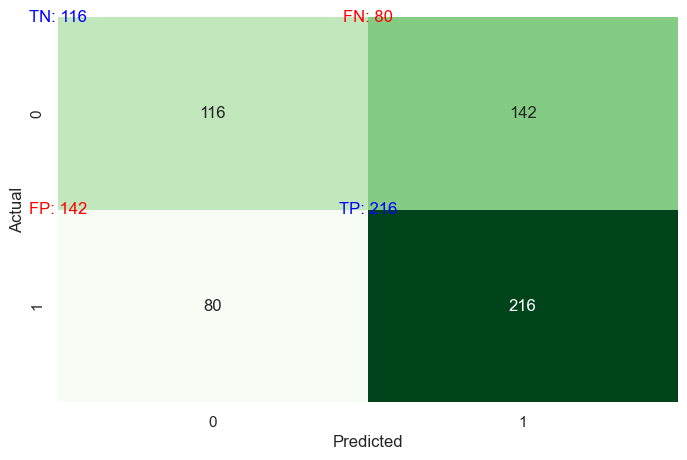

In [17]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming y_test and y_pred are already defined

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)
cm = cm.round(2)

# Extract individual elements from the confusion matrix
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()

# Create a figure and axis
fig, ax = plt.subplots(figsize=(8, 5))

# Plot the heatmap
sns.heatmap(cm, annot=True, cmap='Greens', fmt='g', cbar=False, ax=ax)

# Label the heatmap with TN, FP, FN, and TP values
ax.text(0, 0, f'TN: {tn}', ha='center', va='center', color='blue', fontsize=12)
ax.text(0, 1, f'FP: {fp}', ha='center', va='center', color='red', fontsize=12)
ax.text(1, 0, f'FN: {fn}', ha='center', va='center', color='red', fontsize=12)
ax.text(1, 1, f'TP: {tp}', ha='center', va='center', color='blue', fontsize=12)

# Set labels for x and y axes
plt.xlabel('Predicted')
plt.ylabel('Actual')

# Display the plot
plt.show()


In [16]:
# print(y_test.tolist())

# ⬆︎⬆︎-----------  F1 Score: 0.660550 -------- ⬆︎⬆︎ (best so far)

## in order to solve the imbalance in calss we use the below code ☟

In [18]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler

# Load your dataset
df2 = pd.read_csv('../dataset/long_beach_level_encoded_numeric_value_nov_26.csv')

# Define the function to categorize stay
def categorize_stay(days_stayed):
    if days_stayed <= 30:
        return 0
    else:
        return 1

# Apply the categorization
df2['stay'] = df2['days_stayed'].apply(categorize_stay)

independent_variables = ['simplified_color_encoded', 'simplified_condition_encoded', 'age']

dependent_variable = 'stay'

X = df2[independent_variables]
y = df2['stay']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42) 

# Use imbalanced-learn to resample the training data
ros = RandomOverSampler(sampling_strategy='auto', random_state=42)  # You can adjust the sampling_strategy as needed
X_resampled, y_resampled = ros.fit_resample(X_train, y_train)

# # Alternatively, you can use RandomUnderSampler for undersampling
# rus = RandomUnderSampler(sampling_strategy='auto', random_state=42)
# X_resampled, y_resampled = rus.fit_resample(X_train, y_train)

# Define the hyperparameter grid for GridSearchCV
params = { 
    'n_estimators': [50, 100, 150],
    'max_features': ['sqrt', 'log2', None],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10],
    'max_leaf_nodes': [5, 10]
}

# Use GridSearchCV with RandomForestClassifier
grid_search_cv = GridSearchCV(
    estimator=RandomForestClassifier(),
    param_grid=params,
    scoring='accuracy',
    cv=5, 
    verbose=1
)

# Fit the model on the resampled data
grid_search_cv.fit(X_resampled, y_resampled)

# Print the best parameters it found
print(grid_search_cv.best_estimator_) 

# Extract the best model from GridSearchCV
use_model = grid_search_cv.best_estimator_

# Evaluate the model on the original test set
y_pred = use_model.predict(X_test)

accuracy = accuracy_score(y_true=y_test, y_pred=y_pred)
print("Accuracy Score: %f" % accuracy)

precision = precision_score(y_true=y_test, y_pred=y_pred)
print("Precision Score: %f" % precision)

recall = recall_score(y_true=y_test, y_pred=y_pred)
print("Recall Score: %f" % recall)

f1 = f1_score(y_true=y_test, y_pred=y_pred)
print('F1 Score: %f' % f1)

# Calculate predicted probabilities, keep only probability for when class = 1
y_pred_proba = use_model.predict_proba(X_test)[:, 1]

auc = roc_auc_score(y_true=y_test, y_score=y_pred_proba)
print('AUC Score: %f' % auc)


Fitting 5 folds for each of 162 candidates, totalling 810 fits
RandomForestClassifier(max_leaf_nodes=10, n_estimators=50)
Accuracy Score: 0.595376
Precision Score: 0.633238
Recall Score: 0.592493
F1 Score: 0.612188
AUC Score: 0.613306


In [19]:
ratio = (y_test == 1).sum() / ((y_test == 0) | (y_test == 1)).sum()
ratio

0.5390173410404624

In [20]:
(y_test == 1).sum()

373

In [21]:
(y_test == 0).sum()

319

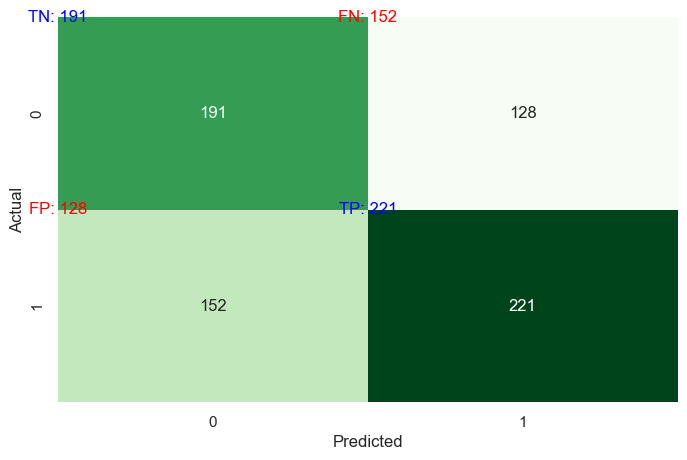

In [22]:

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)
cm = cm.round(2)

# Extract individual elements from the confusion matrix
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()

# Create a figure and axis
fig, ax = plt.subplots(figsize=(8, 5))

# Plot the heatmap
sns.heatmap(cm, annot=True, cmap='Greens', fmt='g', cbar=False, ax=ax)

# Label the heatmap with TN, FP, FN, and TP values
ax.text(0, 0, f'TN: {tn}', ha='center', va='center', color='blue', fontsize=12)
ax.text(0, 1, f'FP: {fp}', ha='center', va='center', color='red', fontsize=12)
ax.text(1, 0, f'FN: {fn}', ha='center', va='center', color='red', fontsize=12)
ax.text(1, 1, f'TP: {tp}', ha='center', va='center', color='blue', fontsize=12)

# Set labels for x and y axes
plt.xlabel('Predicted')
plt.ylabel('Actual')

# Display the plot
plt.show()


# ⬆︎⬆︎-------  F1 Score: 0.612188 ------- ⬆︎⬆︎

### Now we will try to predict how many month a cat will stay using regression ☟

In [128]:
df_month = pd.read_csv('../dataset/long_beach_level_encoded_numeric_value_nov_26.csv')
df_month.head()

,simplified_color,simplified_sex,age,simplified_condition,simplified_type,days_stayed,simplified_color_encoded,simplified_sex_encoded,simplified_condition_encoded,simplified_type_encoded
0,OTHER,MALE,13,NORMAL,STRAY,98,2,1,3,2
1,OTHER,FEMALE,13,NORMAL,OWNER SURRENDER,94,2,0,3,1
2,OTHER,FEMALE,11,NORMAL,OWNER SURRENDER,17,2,0,3,1
3,BLACK,FEMALE,10,OTHER,OWNER SURRENDER,32,0,0,4,1
4,OTHER,MALE,9,NORMAL,OWNER SURRENDER,48,2,1,3,1


In [129]:
# this part is to predict month stay
import pandas as pd

def categorize_days(days_stayed):
    if days_stayed <= 400:
        return np.ceil((days_stayed-15 )/30).astype(int)
    
# def categorize_days(days_stayed):
#     if days_stayed <= 15:
#         return 0
#     elif days_stayed <= 45:
#         return 1
#     elif days_stayed <= 75:
#         return 2
#     elif days_stayed <= 105:
#         return 3
#     # Add more conditions as needed up to 1200 days
#     elif days_stayed <= 1200:
#         # Calculate the month based on the provided conditions
#         return (days_stayed - 105) // 30 + 3
#     else:
#         # Handle cases beyond 1200 days if needed
#         return 100  # or any other value to indicate an outlier

# Example usage:
# Assuming df is your DataFrame and "days_stayed" is the column you want to categorize
df_month['months_stayed'] = df_month['days_stayed'].apply(categorize_days)
df_month.head()


,simplified_color,simplified_sex,age,simplified_condition,simplified_type,days_stayed,simplified_color_encoded,simplified_sex_encoded,simplified_condition_encoded,simplified_type_encoded,months_stayed
0,OTHER,MALE,13,NORMAL,STRAY,98,2,1,3,2,3
1,OTHER,FEMALE,13,NORMAL,OWNER SURRENDER,94,2,0,3,1,3
2,OTHER,FEMALE,11,NORMAL,OWNER SURRENDER,17,2,0,3,1,1
3,BLACK,FEMALE,10,OTHER,OWNER SURRENDER,32,0,0,4,1,1
4,OTHER,MALE,9,NORMAL,OWNER SURRENDER,48,2,1,3,1,2


In [130]:
selected_features = ['simplified_color_encoded', 'simplified_condition_encoded', 'age']

# dependent_variable = 'days_stayed'
X= df_month[selected_features]
y= df_month['months_stayed']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape, X_test.shape

# Using RandomOverSampler to handle imbalanced data
ros = RandomOverSampler(random_state=42)
X_resampled, y_resampled = ros.fit_resample(X_train, y_train)

In [131]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

params = { 
    'n_estimators': [50, 100, 150],
    'max_features': ['sqrt', 'log2', None],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10],
    'max_leaf_nodes': [5, 10]
}

# Initialize your GridSearchCV with a RandomForestRegressor, your param_grid, and what you are optimizing for (MSE).
grid_search_cv = GridSearchCV(
    estimator=RandomForestRegressor(),
    param_grid=params,
    scoring='neg_mean_squared_error',  # For regression, use neg_mean_squared_error as the scoring metric.
    cv=5, 
    verbose=1
)

# Fit your GridSearchCV with your training data.
grid_search_cv.fit(X_resampled, y_resampled)

# Get the best estimator based on the mean squared error.
best_model = grid_search_cv.best_estimator_


Fitting 5 folds for each of 162 candidates, totalling 810 fits


In [132]:
from sklearn.metrics import mean_squared_error, r2_score  # Import r2_score

# # Map 'class' to binary labels (0 for <=50K and 1 for >50K)
# y_binary = (y == ' >50K').astype(int)

# Split the data into training and testing sets
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# # Initialize the Decision Tree classifier
# model = RandomForestRegressor(random_state=42)

# Fit the model
best_model.fit(X_resampled, y_resampled)

# Make predictions

y_pred = np.round(best_model.predict(X_test))

# Specify the positive label

# Evaluate the model
mse = mean_squared_error(y_true=y_test, y_pred=y_pred)
print("Mean Squared Error: %f" % mse)

r2 = r2_score(y_true=y_test, y_pred=y_pred)
print("R-squared Score: %f" % r2)


## Eval Model 
accuracy = accuracy_score(y_true=y_test, y_pred=y_pred)
print("Accuracy Score: %f" % accuracy)

Mean Squared Error: 11.014440
R-squared Score: -2.728426
Accuracy Score: 0.036101


In [133]:
len(y_pred)
# max(y_pred)

554

In [134]:
y_pred

array([4., 4., 4., 4., 5., 3., 4., 4., 8., 6., 4., 5., 4., 5., 4., 4., 4.,
       4., 4., 5., 5., 5., 5., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4., 4.,
       4., 4., 4., 5., 5., 5., 4., 4., 5., 4., 4., 4., 4., 4., 5., 4., 5.,
       4., 4., 4., 6., 4., 5., 4., 5., 4., 3., 4., 4., 4., 4., 5., 4., 4.,
       2., 4., 4., 4., 4., 5., 5., 4., 4., 4., 4., 4., 5., 5., 6., 4., 5.,
       4., 4., 4., 4., 4., 4., 5., 5., 5., 5., 4., 5., 4., 4., 4., 4., 4.,
       4., 4., 5., 4., 4., 4., 5., 4., 5., 5., 5., 4., 4., 5., 5., 4., 5.,
       5., 3., 4., 4., 5., 5., 4., 4., 4., 5., 4., 4., 4., 4., 4., 4., 5.,
       4., 4., 4., 4., 5., 4., 4., 4., 4., 4., 4., 4., 5., 5., 5., 5., 4.,
       5., 5., 4., 5., 4., 4., 4., 4., 4., 4., 5., 6., 4., 6., 4., 4., 4.,
       5., 6., 4., 5., 4., 5., 4., 6., 6., 4., 5., 4., 4., 4., 5., 5., 4.,
       5., 4., 5., 4., 4., 4., 4., 5., 5., 4., 4., 4., 5., 5., 5., 4., 4.,
       5., 5., 4., 4., 4., 4., 4., 4., 5., 4., 4., 7., 4., 6., 4., 4., 4.,
       3., 4., 4., 4., 2.

In [135]:
# y_pred_series is our Pandas Series
y_pred_series = pd.Series(y_pred)

# Count occurrences of each unique value
value_counts = y_pred_series.value_counts()

# Sort the values based on unique values
sorted_value_counts = value_counts.sort_index()

# Display the sorted result
print("Sorted Value Counts:")
print(sorted_value_counts)


Sorted Value Counts:
2.0      2
3.0      6
4.0    342
5.0    167
6.0     34
7.0      1
8.0      1
9.0      1
dtype: int64


In [136]:
len(y_test)

554

In [137]:

# y_test_series is our Pandas Series
y_test_series = pd.Series(y_test)

# Count occurrences of each unique value
value_counts = y_test_series.value_counts()

# Sort the values based on unique values
sorted_value_counts = value_counts.sort_index()

# Display the sorted result
print("Sorted Value Counts:")
print(sorted_value_counts)


Sorted Value Counts:
0     148
1     185
2      90
3      67
4      32
5       9
6       8
7       7
8       4
9       3
10      1
Name: months_stayed, dtype: int64


In [42]:
print(y_test.tolist())


[0, 2, 1, 1, 3, 0, 2, 2, 1, 1, 2, 0, 1, 1, 1, 5, 1, 1, 2, 0, 1, 4, 2, 1, 3, 4, 1, 2, 0, 0, 1, 0, 0, 1, 1, 3, 1, 3, 0, 2, 1, 0, 5, 1, 1, 0, 0, 3, 0, 4, 6, 3, 2, 2, 3, 2, 1, 3, 3, 7, 6, 0, 1, 1, 1, 0, 3, 0, 3, 3, 1, 0, 1, 0, 1, 2, 0, 3, 2, 4, 4, 3, 3, 2, 1, 0, 1, 0, 5, 1, 0, 0, 3, 1, 0, 1, 2, 1, 2, 1, 2, 2, 0, 1, 1, 5, 2, 1, 0, 3, 8, 4, 1, 1, 4, 0, 0, 2, 8, 1, 0, 1, 1, 3, 1, 2, 3, 1, 1, 1, 3, 2, 3, 0, 1, 10, 0, 2, 1, 1, 3, 1, 2, 0, 1, 0, 1, 2, 1, 1, 2, 0, 0, 2, 0, 0, 3, 0, 3, 1, 0, 4, 0, 3, 8, 2, 4, 7, 2, 0, 6, 1, 3, 3, 2, 2, 3, 1, 0, 0, 1, 2, 1, 1, 0, 6, 1, 2, 2, 1, 2, 2, 3, 2, 0, 0, 0, 0, 0, 3, 2, 0, 1, 4, 0, 1, 3, 1, 1, 5, 6, 3, 3, 3, 1, 2, 2, 1, 4, 0, 1, 1, 1, 1, 0, 3, 0, 0, 6, 1, 2, 0, 1, 0, 1, 4, 0, 1, 1, 0, 0, 1, 3, 0, 1, 0, 4, 2, 0, 0, 1, 0, 4, 1, 2, 1, 1, 3, 1, 0, 4, 0, 0, 1, 2, 2, 3, 1, 0, 1, 0, 1, 4, 0, 9, 1, 3, 2, 0, 0, 0, 1, 0, 2, 1, 4, 0, 0, 7, 1, 1, 1, 0, 7, 0, 3, 0, 2, 1, 0, 1, 1, 0, 0, 2, 0, 0, 3, 2, 1, 5, 1, 3, 0, 0, 1, 4, 2, 2, 0, 1, 1, 4, 1, 1, 4, 1, 2, 0, 1, 5, 1, 4,

# ⬆︎----(over sampling) Accuracy Score: 0.036101, R2: -2.728426 ----- ⬆︎

# Trying with Randomclassifier

In [138]:
df_month_class = pd.read_csv('../dataset/long_beach_level_encoded_numeric_value_nov_26.csv')
df_month_class.head()

,simplified_color,simplified_sex,age,simplified_condition,simplified_type,days_stayed,simplified_color_encoded,simplified_sex_encoded,simplified_condition_encoded,simplified_type_encoded
0,OTHER,MALE,13,NORMAL,STRAY,98,2,1,3,2
1,OTHER,FEMALE,13,NORMAL,OWNER SURRENDER,94,2,0,3,1
2,OTHER,FEMALE,11,NORMAL,OWNER SURRENDER,17,2,0,3,1
3,BLACK,FEMALE,10,OTHER,OWNER SURRENDER,32,0,0,4,1
4,OTHER,MALE,9,NORMAL,OWNER SURRENDER,48,2,1,3,1


In [139]:
# this part is to predict month stay
import pandas as pd

def categorize_days(days_stayed):
    if days_stayed <= 300:
        return np.ceil((days_stayed-15 )/30).astype(int)
    else:
        # Handle cases beyond 1200 days if needed
        return 99  # or any other value to indicate an outlier

# Example usage:
# Assuming df is your DataFrame and "days_stayed" is the column you want to categorize
df_month_class['months_stayed'] = df_month_class['days_stayed'].apply(categorize_days)
df_month_class.head()


,simplified_color,simplified_sex,age,simplified_condition,simplified_type,days_stayed,simplified_color_encoded,simplified_sex_encoded,simplified_condition_encoded,simplified_type_encoded,months_stayed
0,OTHER,MALE,13,NORMAL,STRAY,98,2,1,3,2,3
1,OTHER,FEMALE,13,NORMAL,OWNER SURRENDER,94,2,0,3,1,3
2,OTHER,FEMALE,11,NORMAL,OWNER SURRENDER,17,2,0,3,1,1
3,BLACK,FEMALE,10,OTHER,OWNER SURRENDER,32,0,0,4,1,1
4,OTHER,MALE,9,NORMAL,OWNER SURRENDER,48,2,1,3,1,2


In [140]:
# counting each groups frequency
grouped_data = df_month_class['months_stayed'].value_counts().sort_index()
grouped_data.columns = ['months_stayed', 'Count']
print(grouped_data)

0     788
1     866
2     440
3     297
4     167
5      69
6      54
7      36
8      25
9      20
10      4
Name: months_stayed, dtype: int64


In [141]:
from sklearn.utils import class_weight
from sklearn.utils.class_weight import compute_sample_weight

In [142]:
selected_features = ['simplified_color_encoded', 'simplified_condition_encoded', 'age']

# dependent_variable = 'days_stayed'
X= df_month_class[selected_features]
y= df_month_class['months_stayed']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Using RandomOverSampler to handle imbalanced data
ros = RandomOverSampler(random_state=42)
X_resampled, y_resampled = ros.fit_resample(X_train, y_train)

X_train.shape, X_test.shape

((2212, 3), (554, 3))

In [143]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

params = { 
    'n_estimators': [50, 100, 150],
    'max_features': ['sqrt', 'log2', None],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10],
    'max_leaf_nodes': [5, 10]
}

# Initialize your GridSearchCV with a RandomForestRegressor, your param_grid, and what you are optimizing for (MSE).
grid_search_cv = GridSearchCV(
    estimator=RandomForestClassifier(),
    param_grid=params,
    scoring='neg_mean_squared_error',  # For regression, use neg_mean_squared_error as the scoring metric.
    cv=5, 
    verbose=1
)

# Fit your GridSearchCV with your training data.
grid_search_cv.fit(X_resampled, y_resampled)

# Get the best estimator based on the mean squared error.
best_model = grid_search_cv.best_estimator_


Fitting 5 folds for each of 162 candidates, totalling 810 fits


In [58]:
from sklearn.metrics import mean_squared_error, r2_score  # Import r2_score
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Fit the model
best_model.fit(X_resampled, y_resampled)

# Make predictions

y_pred = best_model.predict(X_test)

# Calculate precision, recall, and F1 score

precision = precision_score(y_true=y_test, y_pred=y_pred, average='weighted')  # Adjust average if needed
print("Precision Score: %f" % precision)

recall = recall_score(y_true=y_test, y_pred=y_pred, average='weighted')  # Adjust average if needed
print("Recall Score: %f" % recall)

f1 = f1_score(y_true=y_test, y_pred=y_pred, average='weighted')  # Adjust average if needed
print('F1 Score: %f' % f1)

# Calculate predicted probabilities, keep only probability for when class = 1
y_pred_proba = best_model.predict_proba(X_test_scaled)[:, 1]


Precision Score: 0.023027
Recall Score: 0.034296
F1 Score: 0.013658


/Users/ubaydulsami/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/ubaydulsami/anaconda3/lib/python3.11/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [144]:
# y_pred_series is our Pandas Series
y_pred_series = pd.Series(y_pred)

# Count occurrences of each unique value
value_counts = y_pred_series.value_counts()

# Sort the values based on unique values
sorted_value_counts = value_counts.sort_index()

# Display the sorted result
print("Sorted Value Counts:")
print(sorted_value_counts)


Sorted Value Counts:
2.0      2
3.0      6
4.0    342
5.0    167
6.0     34
7.0      1
8.0      1
9.0      1
dtype: int64


In [61]:
# y_pred_series is our Pandas Series
y_test_series = pd.Series(y_test)

# Count occurrences of each unique value
value_counts = y_test_series.value_counts()

# Sort the values based on unique values
sorted_value_counts = value_counts.sort_index()

# Display the sorted result
print("Sorted Value Counts:")
print(sorted_value_counts)


Sorted Value Counts:
0     148
1     185
2      90
3      67
4      32
5       9
6       8
7       7
8       4
9       3
10      1
Name: months_stayed, dtype: int64


# --------- F1 Score: 0.013658 ------------

# 2nd approch (all code together) RandomForestRegression

In [108]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score
from imblearn.under_sampling import RandomUnderSampler
# Load the dataset
df_month_short = pd.read_csv('../dataset/long_beach_level_encoded_numeric_value_nov_26.csv')

# Define a function to categorize days
def categorize_days(days_stayed):
    if days_stayed <= 300:
        return np.ceil((days_stayed - 15) / 30).astype(int)
    else:
        return 99  # or any other value to indicate an outlier

# Apply the categorization to create a new column 'months_stayed'
df_month_short['months_stayed'] = df_month_short['days_stayed'].apply(categorize_days)

# Define selected features
selected_features = ['simplified_color_encoded',  
                     'simplified_condition_encoded', 'age']

# Set up X and y
X = df_month_short[selected_features]
y = df_month_short['months_stayed']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Handle class imbalance using RandomUnderSampler
rus = RandomOverSampler(random_state=42)
X_resampled, y_resampled = rus.fit_resample(X_train, y_train)

# Define the parameter grid for GridSearchCV
params = {
    'n_estimators': [50, 100, 150],
    'max_features': ['sqrt', 'log2', None],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10],
    'max_leaf_nodes': [5, 10]
}

# Initialize RandomForestClassifier
rf_classifier = RandomForestClassifier(class_weight='balanced', random_state=42)

# Initialize GridSearchCV
grid_search_cv = GridSearchCV(
    estimator=rf_classifier,
    param_grid=params,
    scoring='f1_weighted',  # Use F1 score for classification and consider class imbalance
    cv=5,
    verbose=1
)

# Fit GridSearchCV with resampled training data
grid_search_cv.fit(X_resampled, y_resampled)

# Get the best estimator based on F1 score
best_model = grid_search_cv.best_estimator_

# Fit the best model with the original training data
best_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = best_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_true=y_test, y_pred=y_pred)
f1 = f1_score(y_true=y_test, y_pred=y_pred, average='weighted')
print("Accuracy Score: %f" % accuracy)
print("F1 Score: %f" % f1)

Fitting 5 folds for each of 162 candidates, totalling 810 fits
Accuracy Score: 0.124549
F1 Score: 0.129868


In [109]:
feature_importance = pd.Series(best_model.feature_importances_, index=X.columns)
feature_importance.sort_values(ascending=False, inplace=True)
print(feature_importance)

age                             0.421687
simplified_color_encoded        0.321384
simplified_condition_encoded    0.256929
dtype: float64


In [110]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print(f"MAE: {mae}, MSE: {mse}, RMSE: {rmse}")

MAE: 3.9657039711191335, MSE: 23.73826714801444, RMSE: 4.872193258483744


In [111]:
len(y_pred)
# max(y_pred)

554

In [112]:
# Create a DataFrame with residuals
residuals_df = pd.DataFrame({'True Values': y_test, 'Predicted Values': y_pred, 'Residuals': residuals})

# Sort the DataFrame by residuals in ascending order
residuals_df_sorted = residuals_df.sort_values(by='Residuals', ascending=True)

# Display the sorted DataFrame
print("Sorted by Residuals (Ascending):")
print(residuals_df_sorted.head(50))

# Sort the DataFrame by residuals in descending order
residuals_df_sorted_desc = residuals_df.sort_values(by='Residuals', ascending=False)

# Display the sorted DataFrame
print("Sorted by Residuals (Descending):")
print(residuals_df_sorted_desc.head(50))

Sorted by Residuals (Ascending):
      True Values  Predicted Values  Residuals
2357            0                10        -10
1005            0                10        -10
1196            0                 8         -9
1366            0                 9         -9
1830            0                 9         -9
45              0                 8         -9
1905            0                 9         -9
1898            0                 6         -9
2628            0                 9         -9
819             0                 9         -9
2575            0                 9         -9
432             0                 8         -9
495             0                 9         -9
2446            0                 6         -9
2380            0                 6         -9
1265            0                 9         -9
1351            0                 0         -9
2402            0                10         -9
1213            0                 9         -9
1385            0          

In [113]:
print(residuals_df_sorted_desc[residuals_df_sorted_desc['Residuals']==0].head(50))

      True Values  Predicted Values  Residuals
199             0                 0          0
1850            0                 0          0
457             3                 3          0
2684            1                 1          0
1596            7                 7          0
1771            0                 0          0
2548            0                 0          0
1307            0                 0          0
834             0                 0          0
1309            0                 5          0
533             3                 3          0
2394            8                 8          0
1293            3                 3          0
2539            0                 0          0
2171            0                 0          0
1222            0                 0          0
1861            3                 3          0
463             3                 3          0
2702            3                 3          0
567             3                 3          0
581          

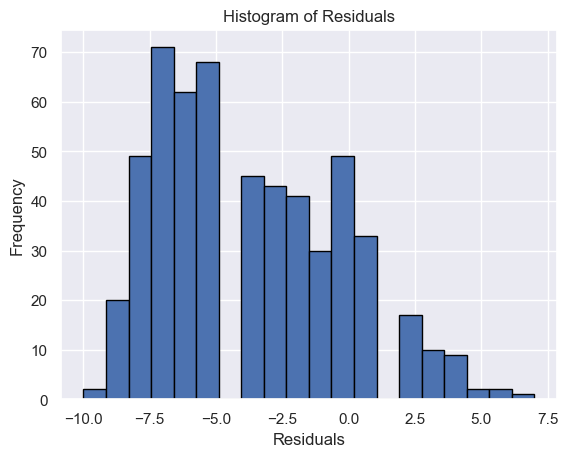

In [114]:
# Plot histogram of residuals
plt.hist(residuals_df['Residuals'], bins=20, edgecolor='black')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.title('Histogram of Residuals')
plt.show()

In [90]:
# y_pred_series is our Pandas Series
y_pred_series = pd.Series(y_pred)

# Count occurrences of each unique value
value_counts = y_pred_series.value_counts()

# Sort the values based on unique values
sorted_value_counts = value_counts.sort_index()

# Display the sorted result
print("Sorted Value Counts:")
print(sorted_value_counts)


Sorted Value Counts:
0      87
1      17
3      75
4      11
5      44
6      64
7      61
8     117
9      68
10     10
dtype: int64


In [91]:
len(y_test)

554

In [92]:

# y_test_series is our Pandas Series
y_test_series = pd.Series(y_test)

# Count occurrences of each unique value
value_counts = y_test_series.value_counts()

# Sort the values based on unique values
sorted_value_counts = value_counts.sort_index()

# Display the sorted result
print("Sorted Value Counts:")
print(sorted_value_counts)


Sorted Value Counts:
0     148
1     185
2      90
3      67
4      32
5       9
6       8
7       7
8       4
9       3
10      1
Name: months_stayed, dtype: int64


# ⬆︎⬆︎---------(Over sampling) F1 Score: 0.129868 -----⬆︎⬆︎

# The below part has error ☟

## ----------------------ignore the below part for now -------------------------

## Sami trying here

In [150]:
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Your feature and target variable definitions
selected_features = ['simplified_color_encoded',  
                     'simplified_condition_encoded', 'age']
X = df[selected_features]
y = df['days_stayed']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define hyperparameter grid
params = {
    'n_estimators': [50, 100, 150],
    'max_features': ['sqrt', 'log2', None],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10],
    'max_leaf_nodes': [5, 10]
}

# Initialize GridSearchCV with RandomForestRegressor
grid_search_cv = GridSearchCV(
    estimator=RandomForestRegressor(),
    param_grid=params,
    scoring='neg_mean_squared_error',
    cv=5,
    verbose=1
)

# Fit GridSearchCV with training data
grid_search_cv.fit(X_train, y_train)

# Get the best estimator based on mean squared error
best_model = grid_search_cv.best_estimator_

# Make predictions using the best model
y_pred = np.round(best_model.predict(X_test))

# Evaluate the model
mse = mean_squared_error(y_true=y_test, y_pred=y_pred)
print("Mean Squared Error: %f" % mse)

r2 = r2_score(y_true=y_test, y_pred=y_pred)
print("R-squared Score: %f" % r2)

# Additional evaluation metrics if needed
accuracy = accuracy_score(y_true=y_test, y_pred=y_pred)
print("Accuracy Score: %f" % accuracy)


Fitting 5 folds for each of 162 candidates, totalling 810 fits
Mean Squared Error: 2469.326715
R-squared Score: 0.024761
Accuracy Score: 0.003610


In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR

# ... (your data loading and preprocessing code)
# Your feature and target variable definitions
selected_features = ['simplified_color_encoded',  
                     'simplified_condition_encoded', 'age']
X = df[selected_features]
y = df['days_stayed']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# New hyperparameter grid
params = {
    'n_estimators': [50, 100, 150, 200],
    'max_features': ['sqrt', 'log2', None],
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'max_leaf_nodes': [5, 10, 15]
}

# GridSearchCV with RandomForestRegressor
grid_search_cv_rf = GridSearchCV(
    estimator=RandomForestRegressor(),
    param_grid=params,
    scoring='neg_mean_squared_error',
    cv=5,
    verbose=1
)

# GridSearchCV with GradientBoostingRegressor
grid_search_cv_gb = GridSearchCV(
    estimator=GradientBoostingRegressor(),
    param_grid=params,
    scoring='neg_mean_squared_error',
    cv=5,
    verbose=1
)

# GridSearchCV with LinearRegression
grid_search_cv_lr = GridSearchCV(
    estimator=LinearRegression(),
    param_grid={},
    scoring='neg_mean_squared_error',
    cv=5,
    verbose=1
)

# GridSearchCV with SVR
grid_search_cv_svr = GridSearchCV(
    estimator=SVR(),
    param_grid={'C': [0.1, 1, 10], 'kernel': ['linear', 'rbf']},
    scoring='neg_mean_squared_error',
    cv=5,
    verbose=1
)

# Fit models
grid_search_cv_rf.fit(X_train, y_train)
grid_search_cv_gb.fit(X_train, y_train)
grid_search_cv_lr.fit(X_train, y_train)
grid_search_cv_svr.fit(X_train, y_train)

# Get best models
best_rf_model = grid_search_cv_rf.best_estimator_
best_gb_model = grid_search_cv_gb.best_estimator_
best_lr_model = grid_search_cv_lr.best_estimator_
best_svr_model = grid_search_cv_svr.best_estimator_

# Evaluate models
models = [best_rf_model, best_gb_model, best_lr_model, best_svr_model]
model_names = ['RandomForestRegressor', 'GradientBoostingRegressor', 'LinearRegression', 'SVR']

for model, name in zip(models, model_names):
    y_pred = np.round(model.predict(X_test))
    mse = mean_squared_error(y_true=y_test, y_pred=y_pred)
    r2 = r2_score(y_true=y_test, y_pred=y_pred)
    print(f"{name} - Mean Squared Error: {mse}, R-squared Score: {r2}")


Fitting 5 folds for each of 432 candidates, totalling 2160 fits
